In [1]:
!pip install tensorflow-gpu

    100% |████████████████████████████████| 345.2MB 58kB/s 


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
!cp gdrive/My\ Drive/_bakalarka/dataset_interpolation/* .
!cp gdrive/My\ Drive/_bakalarka/_my_tools.py .
!ls -l

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive

total 949896
drwx------ 3 root root      4096 Mar 13 13:33 gdrive
-rw------- 1 root root      1592 Mar 13 13:33 _my_tools.py
drwxr-xr-x 1 root root      4096 Mar  8 17:26 sample_data
-rw------- 1 root root 129687680 Mar 13 13:33 X_test.npy
-rw------- 1 root root 518750336 Mar 13 13:33 X_train.npy
-rw------- 1 root root  64843904 Mar 13 13:33 y_test.npy
-rw------- 1 root root 259375232 Mar 13 13:33 y_train.npy


In [0]:
import tensorflow as tf
from tensorflow import keras
import _my_tools as mt
import numpy as np

def compareRes(i,folder=None):
    mt.showImgGC(str(i).zfill(2),X_test[i,:,:,0],y_test[i,:,:,0],res[i,:,:,0],X_test[i,:,:,1],folder=folder)

In [0]:
X_train, y_train, X_test, y_test = mt.loadDataFloat("")

X_train = X_train.swapaxes(1,3)
X_train = X_train.swapaxes(1,2)
X_test = X_test.swapaxes(1,3)
X_test = X_test.swapaxes(1,2)

y_train = np.expand_dims(y_train,3)
y_test = np.expand_dims(y_test,3)

In [10]:
X_train.shape

(63324, 64, 64, 2)

In [3]:
input_img = keras.layers.Input((64,64,2))

m = keras.layers.Conv2D(8,(3,3),activation='relu',padding='same')(input_img)
m = keras.layers.MaxPooling2D((2,2),padding='same')(m)
m = keras.layers.Conv2D(16,(3,3),activation='relu',padding='same')(m)
m = keras.layers.MaxPooling2D((2,2),padding='same')(m)
m = keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(m)
m = keras.layers.MaxPooling2D((2,2),padding='same')(m)
m = keras.layers.Conv2D(64,(3,3),activation='relu',padding='same')(m)
m = keras.layers.MaxPooling2D((2,2),padding='same')(m)
m = keras.layers.Conv2D(128,(3,3),activation='relu',padding='same')(m)
encoded = keras.layers.MaxPooling2D((2,2),padding='same')(m)

m = keras.layers.Conv2D(64,(3,3),activation='relu',padding='same')(encoded)
m = keras.layers.UpSampling2D((2,2))(m)
m = keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(m)
m = keras.layers.UpSampling2D((2,2))(m)
m = keras.layers.Conv2D(16,(3,3),activation='relu',padding='same')(m)
m = keras.layers.UpSampling2D((2,2))(m)
m = keras.layers.Conv2D(8,(3,3),activation='relu',padding='same')(m)
m = keras.layers.UpSampling2D((2,2))(m)
m = keras.layers.Conv2D(4,(3,3),activation='relu',padding='same')(m)

m = keras.layers.UpSampling2D((2,2))(m)
decoded = keras.layers.Conv2D(1,(3,3),activation='relu',padding='same')(m)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 2)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 8)         152       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
__________

In [9]:
checkpoint_path = "08/cp"
cp_callback = keras.callbacks.ModelCheckpoint(checkpoint_path,
                                             save_weights_only=True,
                                             verbose=1)

batch_size = 1024
num_epoch = 10
#model training
model_log = autoencoder.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,          
          validation_data=(X_test, y_test),
          callbacks = [cp_callback])

Train on 63324 samples, validate on 15831 samples
Epoch 1/10
62464/63324 [============================>.] - ETA: 0s - loss: 222.1616
Epoch 00001: saving model to 08/cp

Consider using a TensorFlow optimizer from `tf.train`.
Instructions for updating:
Use tf.train.CheckpointManager to manage checkpoints rather than manually editing the Checkpoint proto.
63324/63324 [==============================] - 17s 261us/sample - loss: 221.5838 - val_loss: 216.5926
Epoch 2/10
62464/63324 [============================>.] - ETA: 0s - loss: 221.7611
Epoch 00002: saving model to 08/cp

Consider using a TensorFlow optimizer from `tf.train`.
63324/63324 [==============================] - 16s 257us/sample - loss: 221.2603 - val_loss: 216.5143
Epoch 3/10
62464/63324 [============================>.] - ETA: 0s - loss: 221.7474
Epoch 00003: saving model to 08/cp

Consider using a TensorFlow optimizer from `tf.train`.
63324/63324 [==============================] - 16s 255us/sample - loss: 221.2685 - val_loss: 

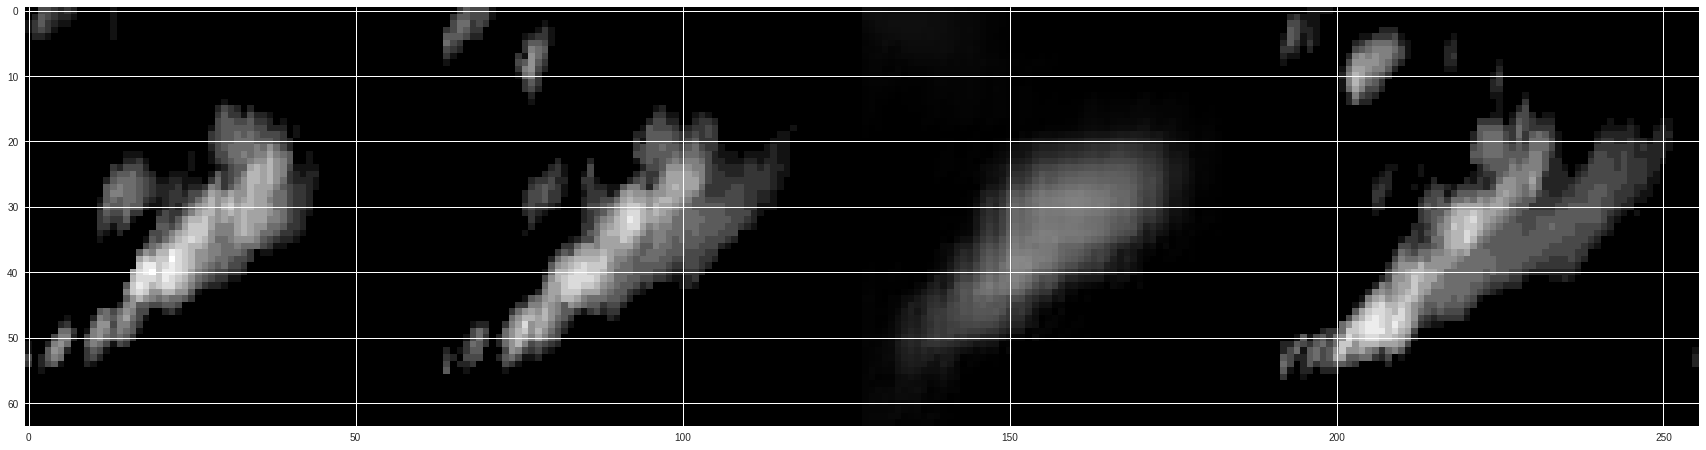

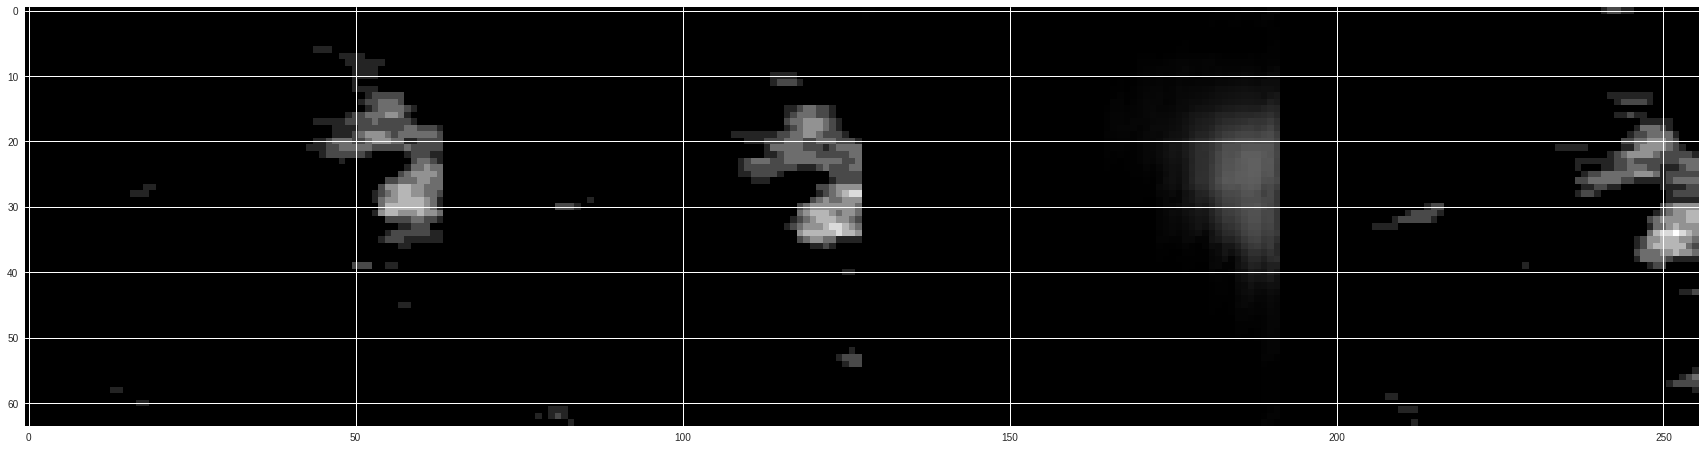

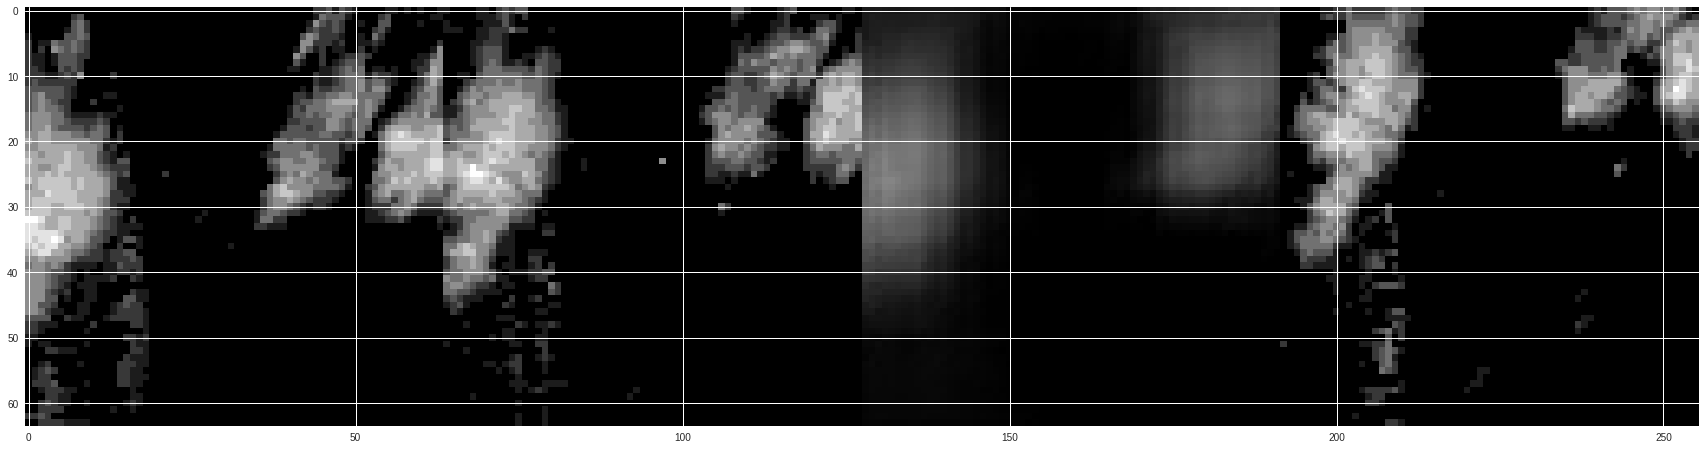

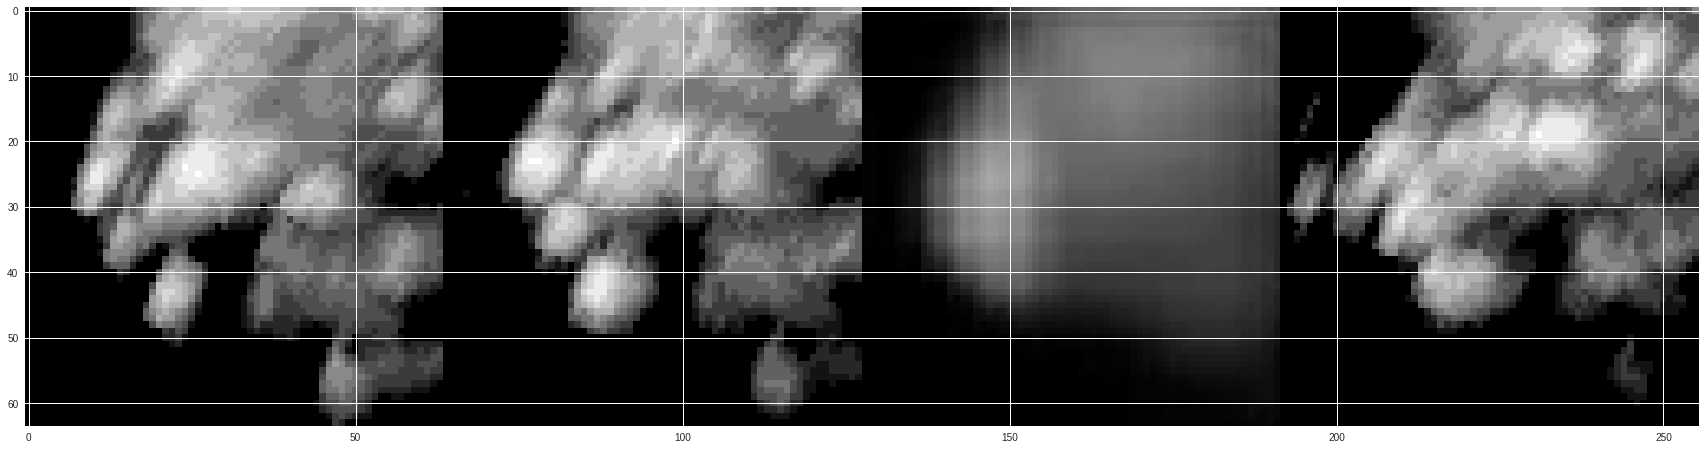

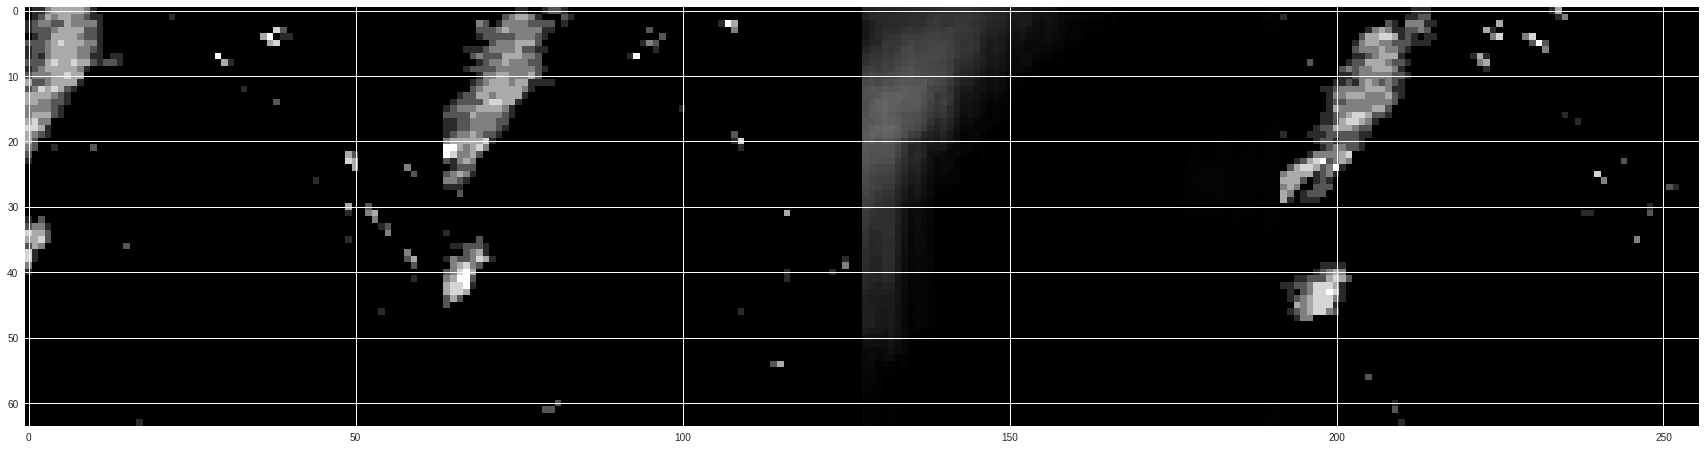

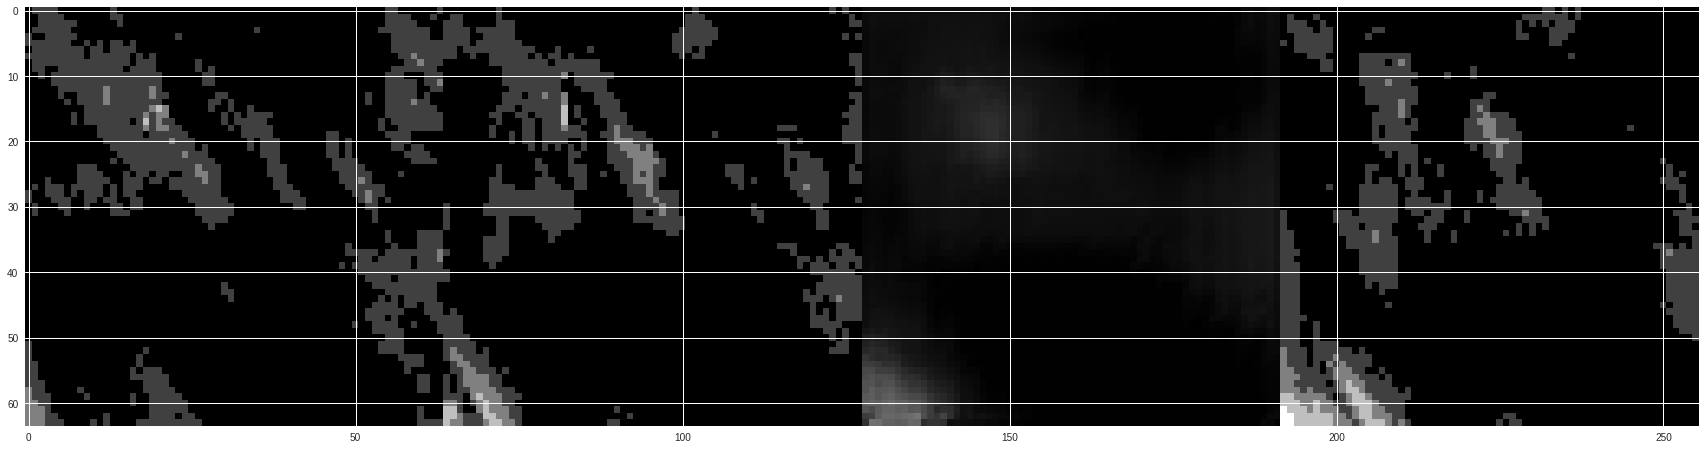

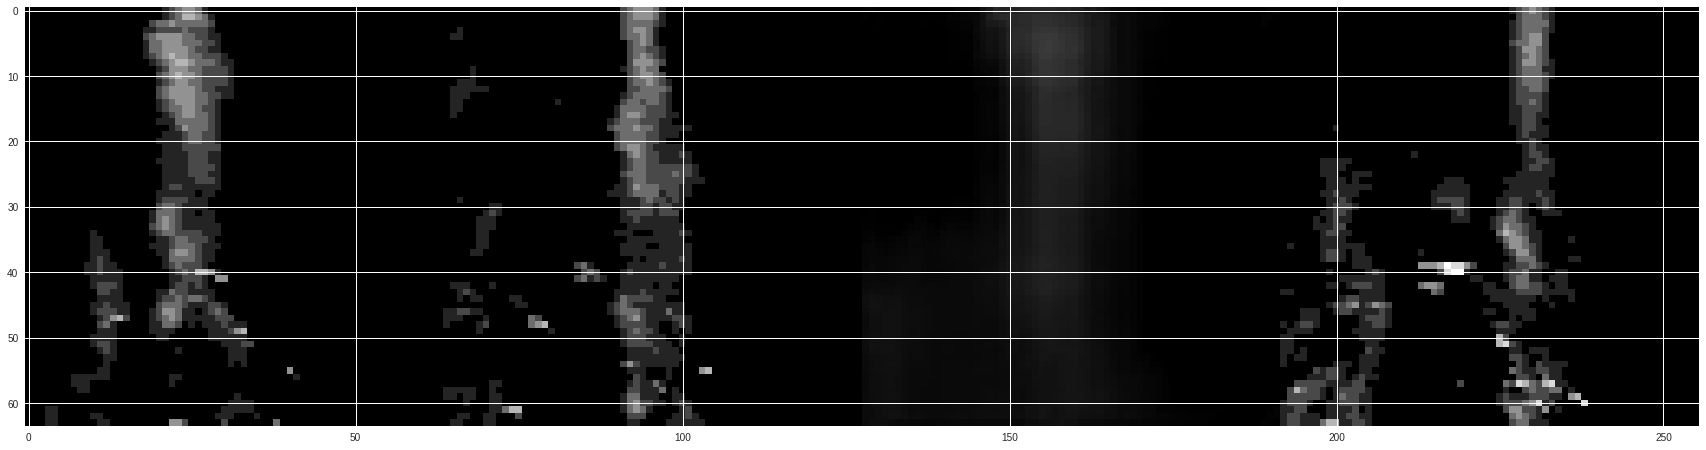

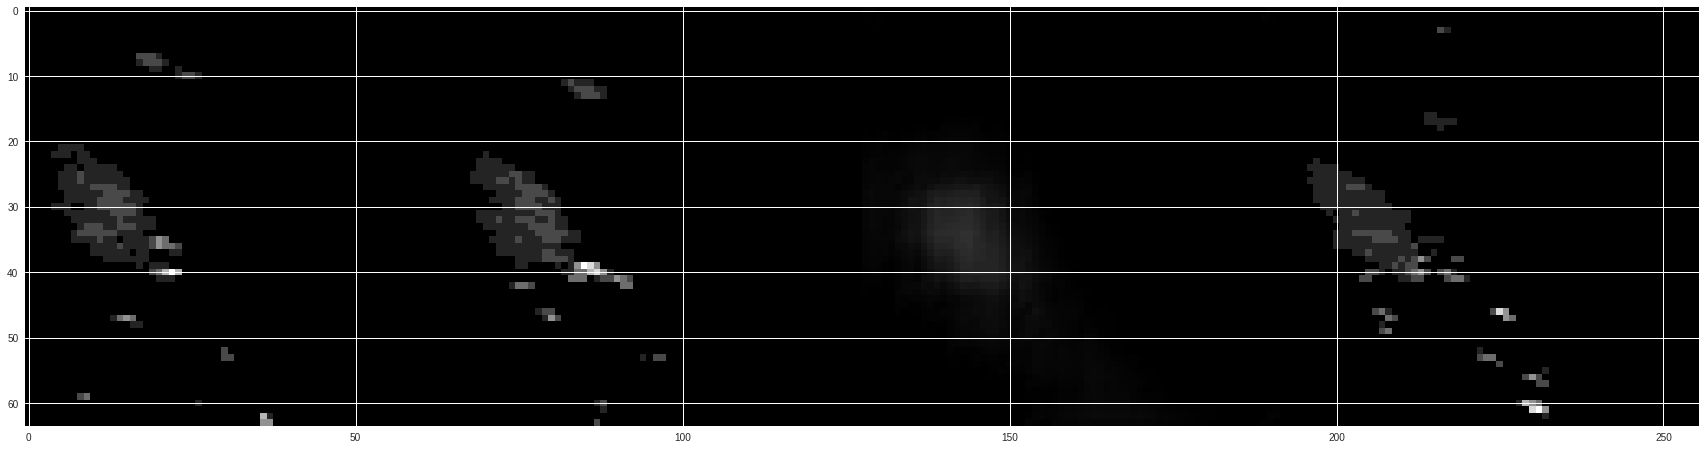

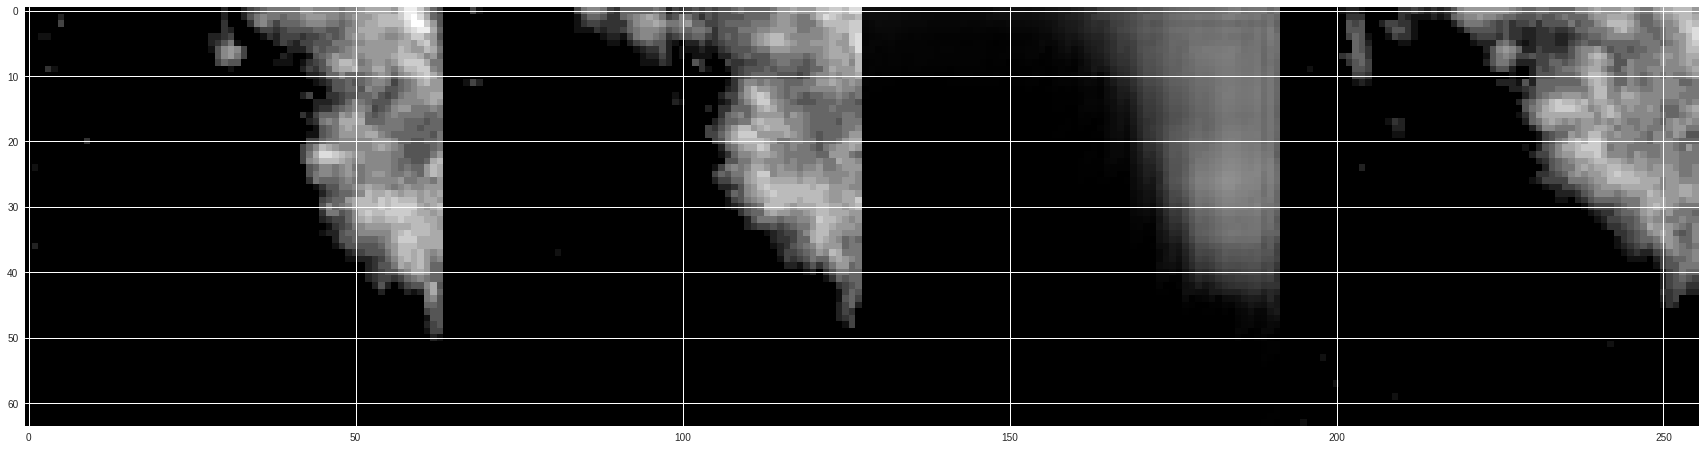

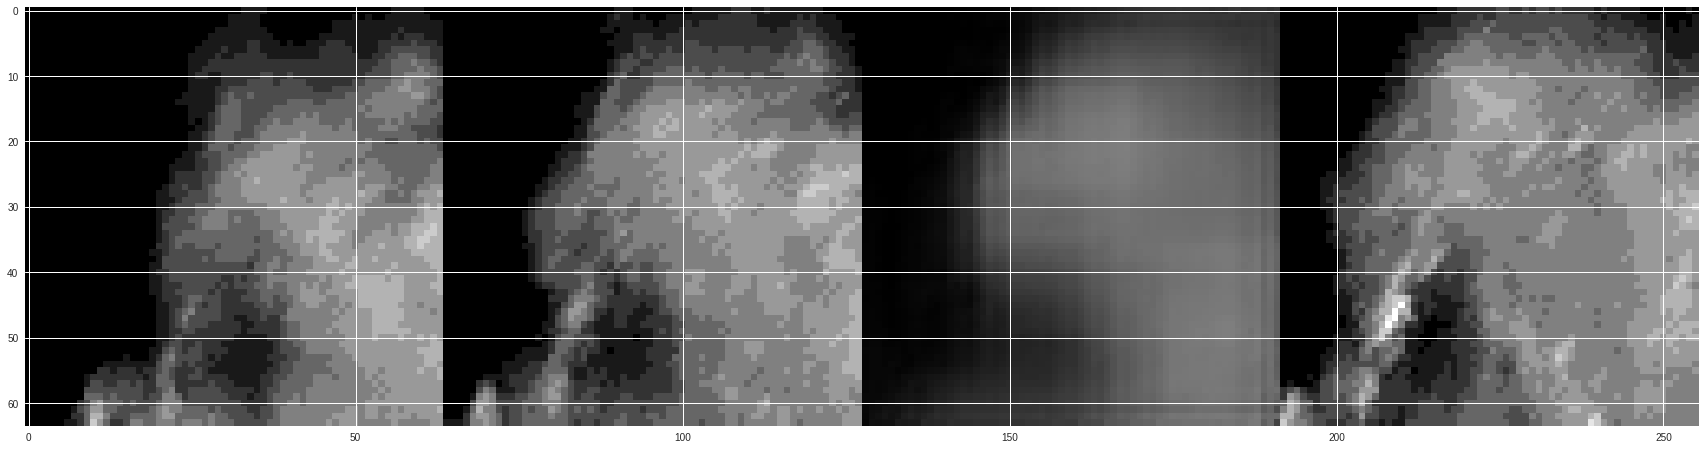

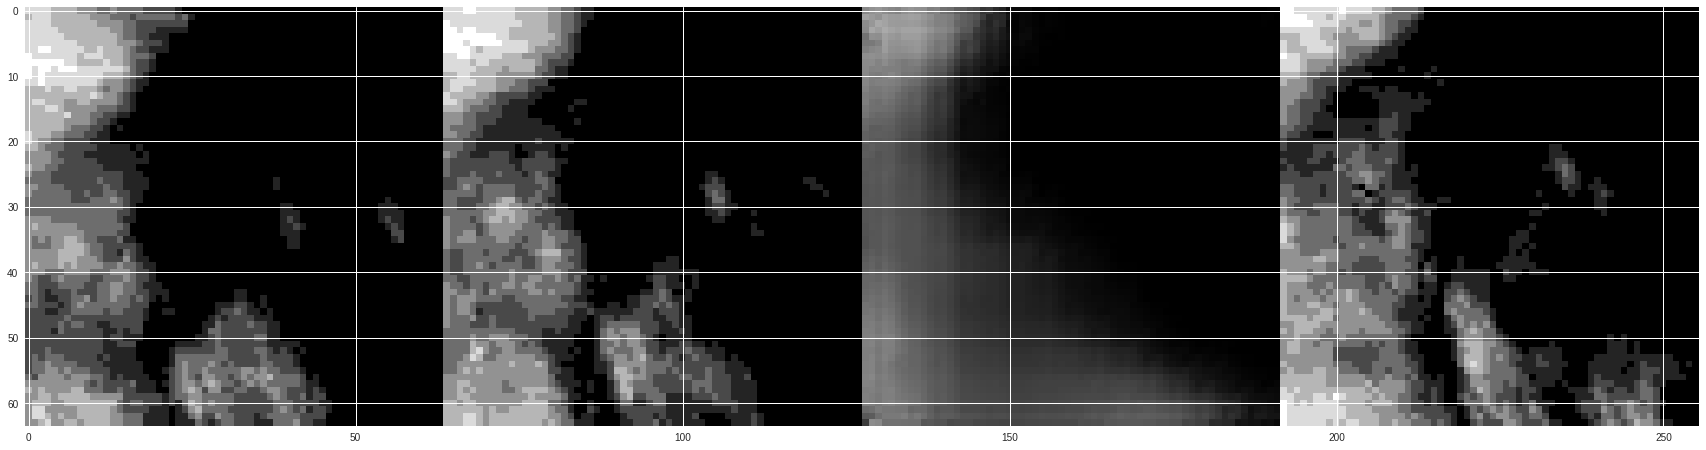

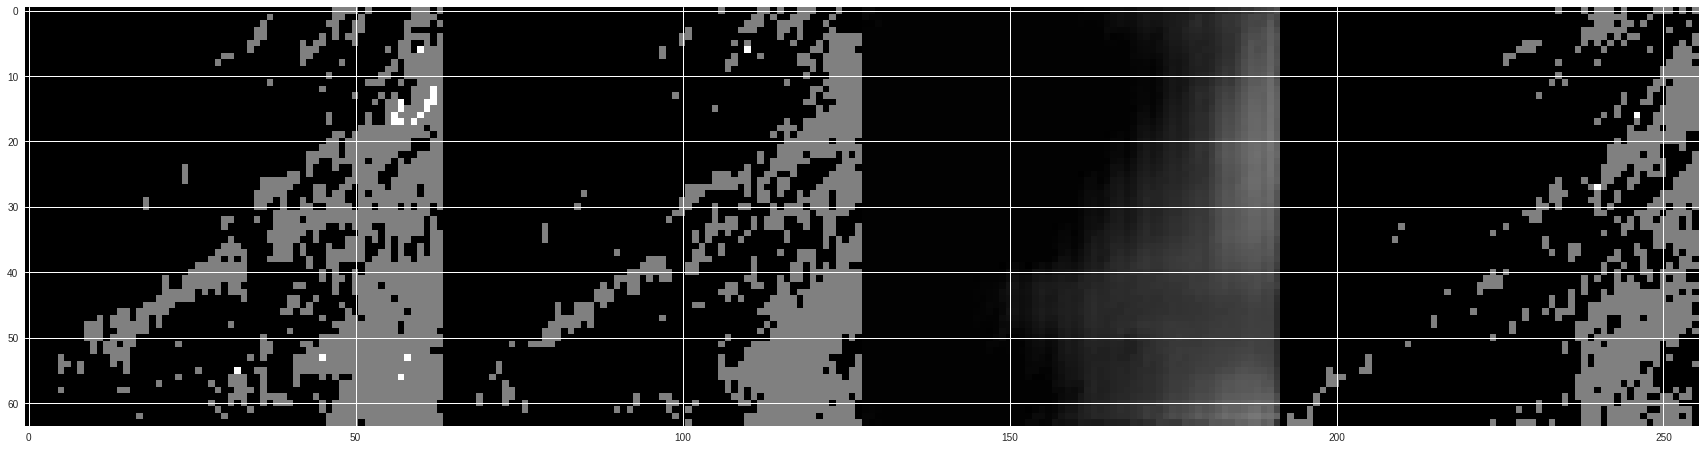

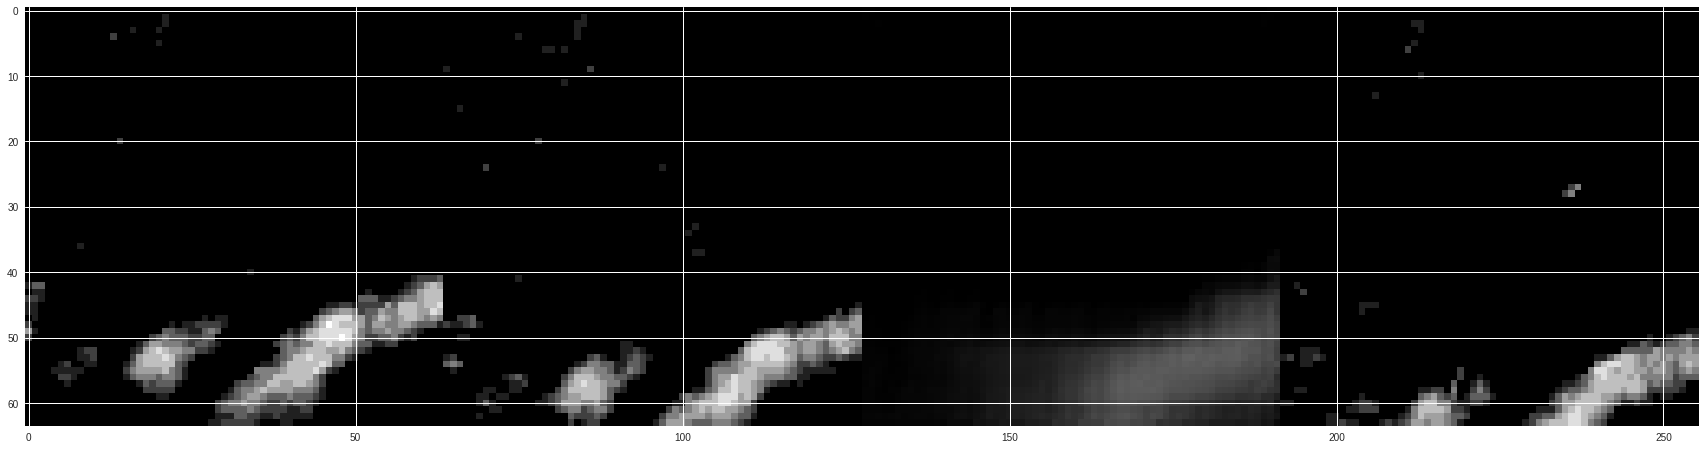

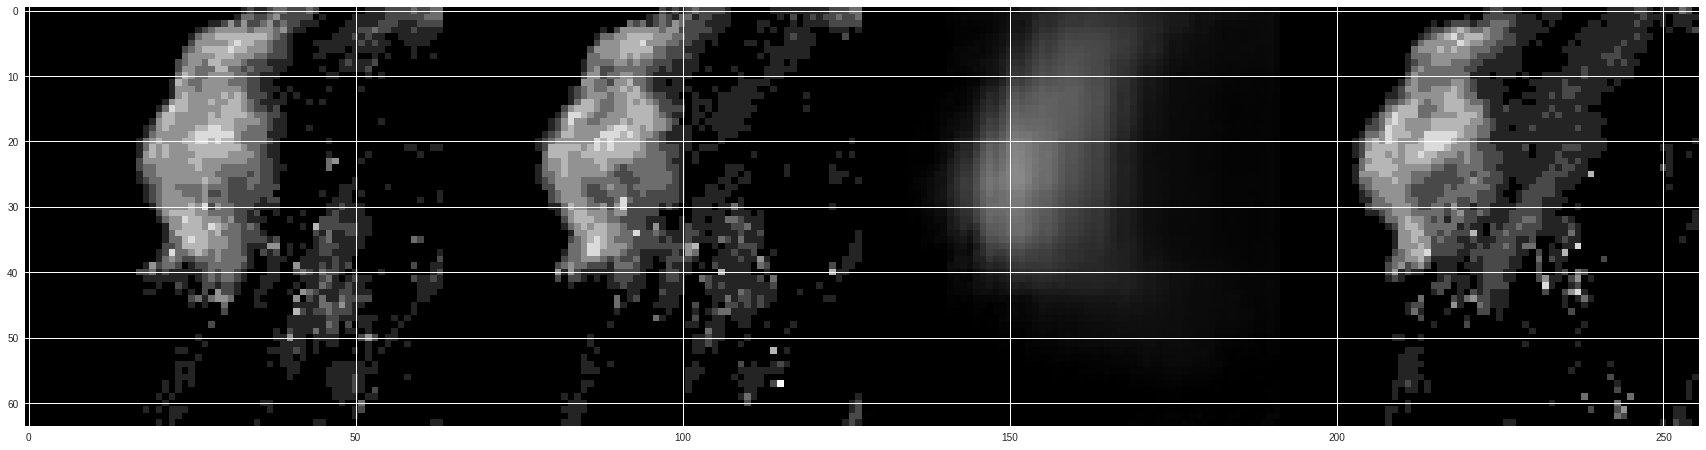

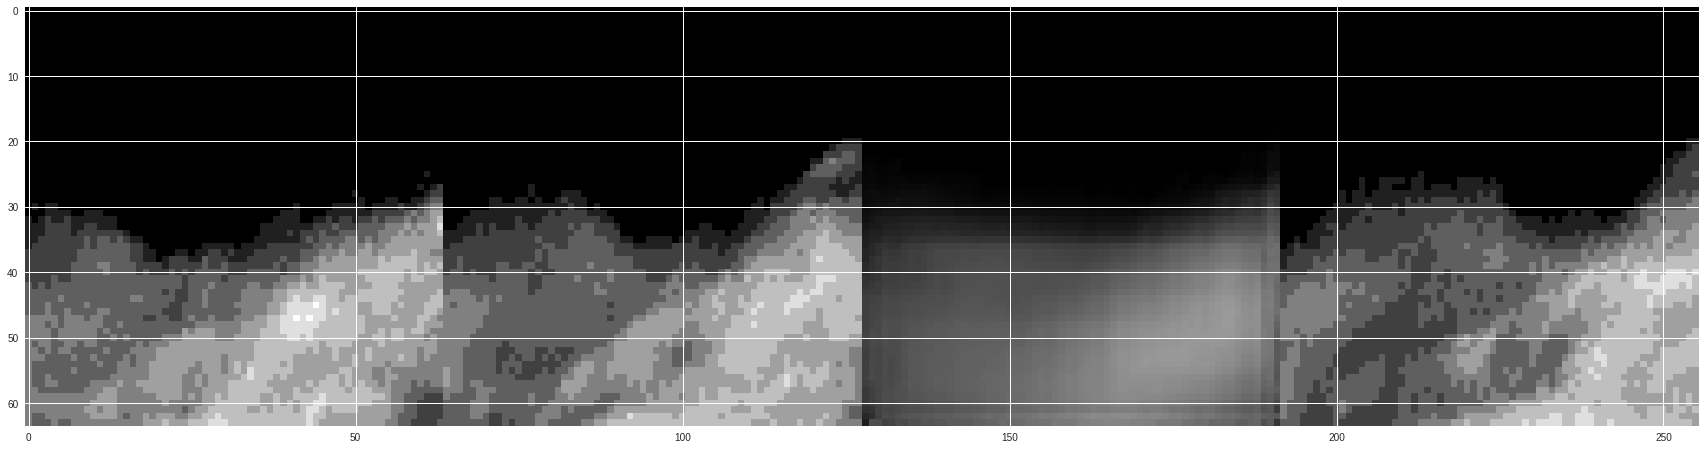

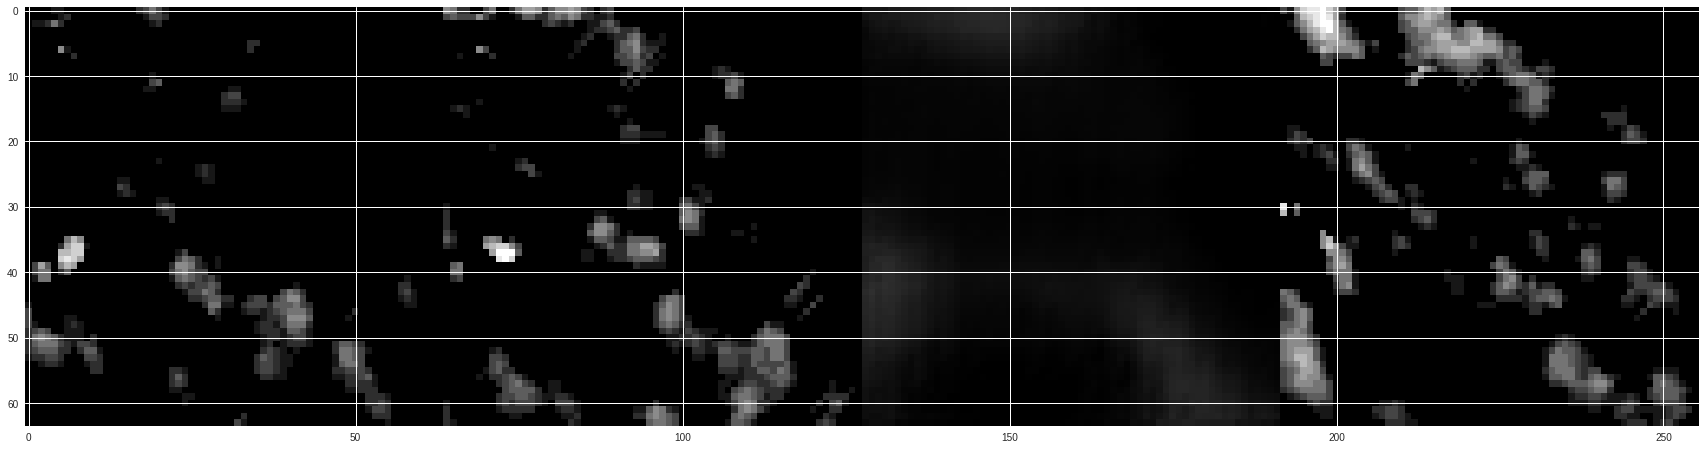

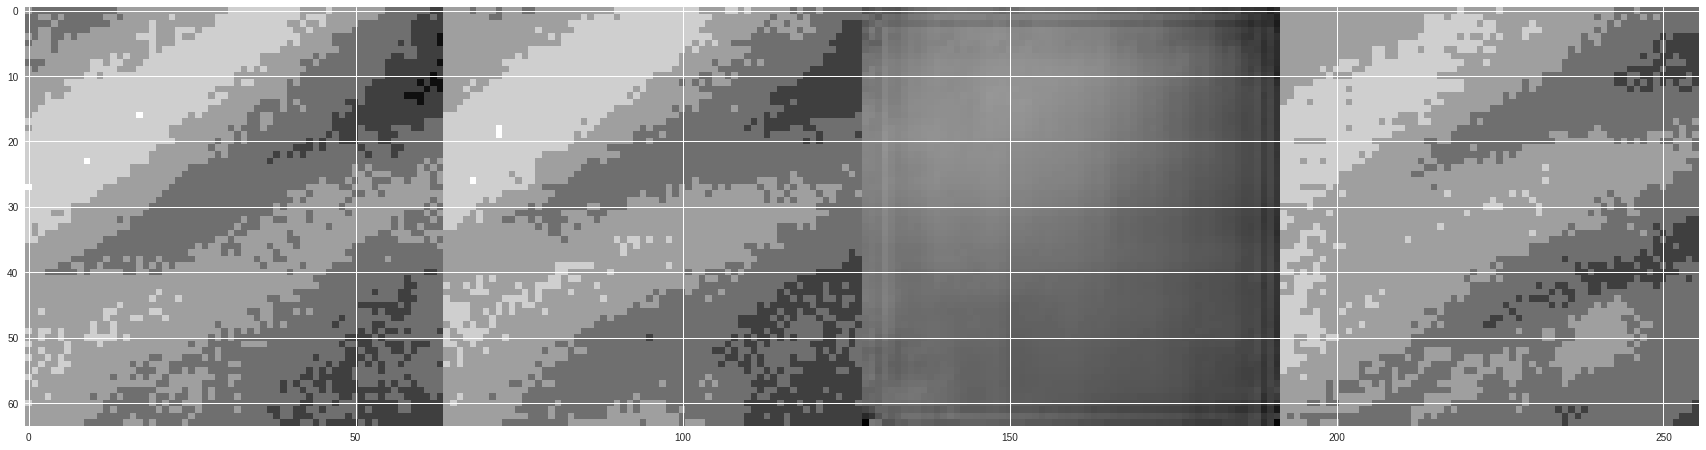

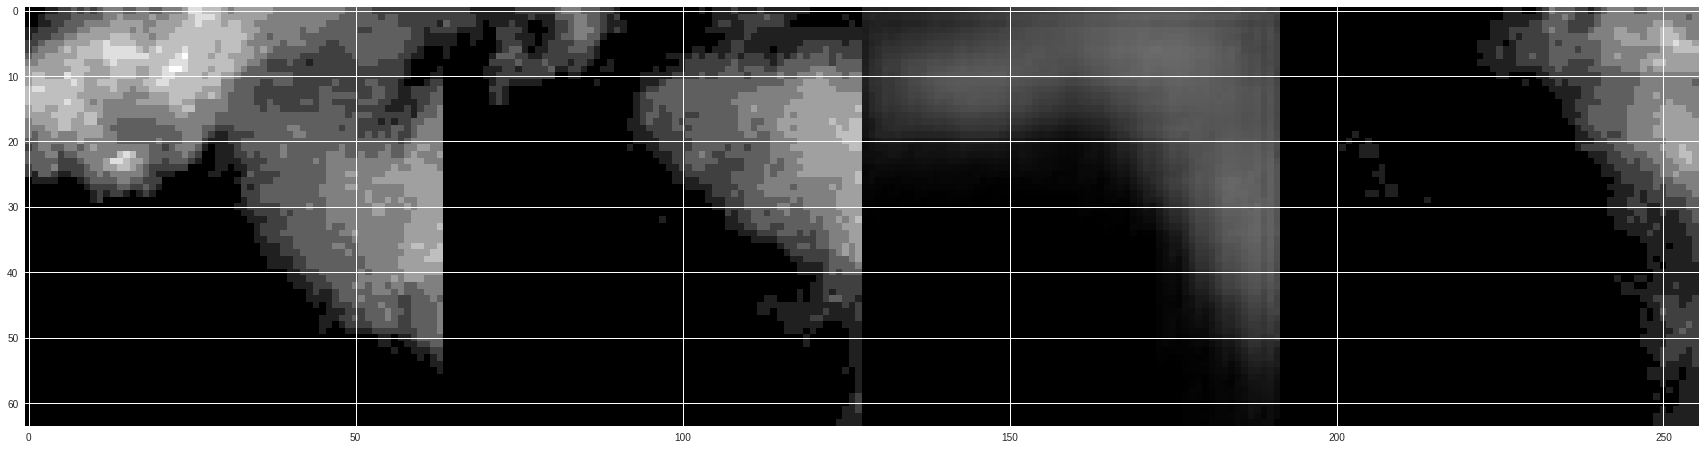

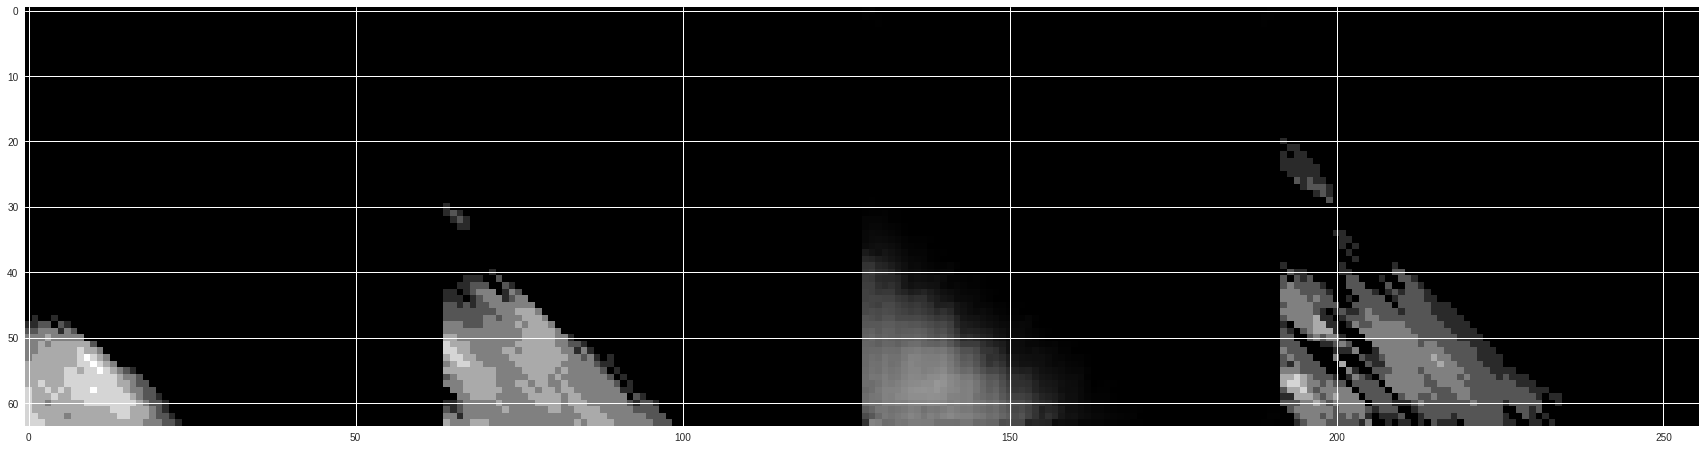

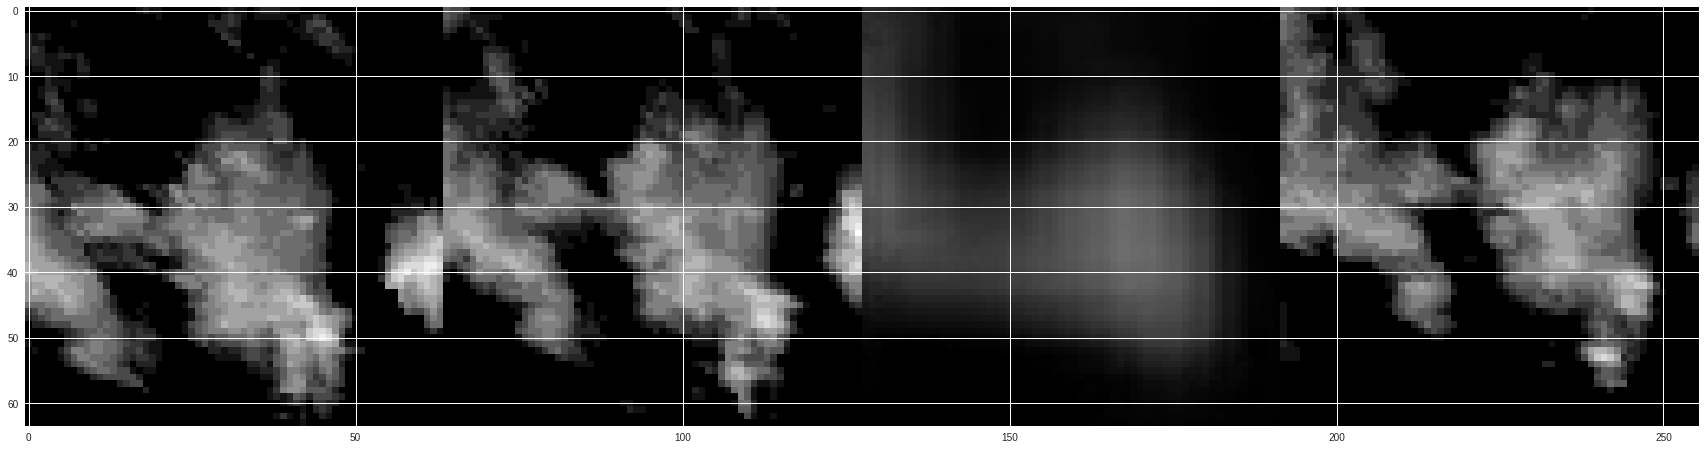

In [10]:
res = autoencoder.predict(X_test[:50])

for i in range(20):
  compareRes(i,"")

In [0]:
import matplotlib.pyplot as plt

In [0]:
mkdir 08